# Análise de Casos de COVID
Em 2020, o mundo foi pego de surpresa quando uma pandemia foi declarada pela
Organização Mundial da Saúde (OMS). COVID-19, uma doença infecciosa causada pelo
vírus SARS-CoV-2 se espalhou rapidamente por todo o mundo e levando milhares de
vítimas a óbito. O Brasil já ultrapassou a marca de 400 mil mortes em abril de 2021, se
aproximando de 500 mil e os casos continuam crescendo.
Você foi contratado pela DHAUZ como cientista de dados para analisar uma base de dados
de um cliente sobre de pacientes infectados pela COVID-19. O cliente deseja descobrir
relações entre dados, entender os perfis de pacientes infectados baseado nas features que
estão disponíveis. Você precisa gerar informações importantes e ferramentas para auxiliar
profissionais como médicos, políticos e líderes de estado no monitoramento e tratamento
dos casos de COVID-19. Selecione os frameworks e ferramentas para seu projeto, mostre
seu conhecimento em storytelling com gráficos adequados, discuta se é necessário
processar ou não os dados e encontre insights importantes.
Informações sobre o dataset:
- As informações são anonimizadas por questões de privacidade
- O dataset foi fornecido pelo governo mexicano e informações adicionais podem ser
consultadas no link https://www.gob.mx/salud/documentos/datos-abiertos-152127
- Base de dados no link: https://dhauz-challenges.s3.amazonaws.com/covid.csv
- Informação importante: a base de dados possui diversos tratamentos de dados que
precisam ser realizados, então tente argumentar cada decisão importante sobre
estes tratamentos.
**Comece respondendo as seguintes questões:*
**a) Desenvolva hipóteses e visualizações envolvendo riscos de internação ou morte
(coluna “icu” ou “death-date”) por COVID-19 para:*
**i) pacientes grávidas (coluna “pregnancy”);*
**ii) pacientes com hipertensão (coluna “hypertension”);*
**b) Desenvolva um modelo preditivo de classificação para predição da variável de
internação (coluna “icu”) da base de dados e avalie métricas relevantes;*
**c) Qual a variável que tem o maior impacto nos pacientes que estão em unidade de
terapia intensiva (variável “icu” no dataset)?*
**d) (BÔNUS) Qual o perfil de paciente que possui maior probabilidade de sair com vida?*

# Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import cufflinks as cf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from imblearn.over_sampling import SMOTE
import joblib
warnings.filterwarnings('ignore')


In [2]:
#Permite trabalhar com plotly offline
cf.go_offline()

In [3]:
# Lendo a base de dados
dados = pd.read_csv('covid.csv')

#  Análise e Exploração dos Dados

Nesta etapa o objetivo é conhecer os dados usando a ferramenta Pandas Profiling.

In [4]:
# Instalando o pandas profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [5]:
# executando o profile
profile = ProfileReport(dados, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [6]:
profile

In [7]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio_COVID19.html")

#### Continuando a análise

In [8]:
# Verificando o data frame com os 5 primeiros registros
dados.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [9]:
# Verificando a quantidade de linhas e de colunas do dataframe
dados.shape

(566602, 23)

In [10]:
# Verificando quais são as colunas do data frame
dados.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [11]:
# Verificando valores únicos de cada coluna do dataframe
vu_sex = np.unique(dados.sex) 
vu_patient_type = np.unique(dados.patient_type) 
vu_entry_date = np.unique(dados.entry_date)
vu_date_symptoms = np.unique(dados.date_symptoms)
vu_date_died = np.unique(dados.date_died)
vu_intubed = np.unique(dados.intubed)
vu_pneumonia = np.unique(dados.pneumonia)
vu_age = np.unique(dados.age)
vu_pregnancy = np.unique(dados.pregnancy)
vu_diabetes = np.unique(dados.diabetes)
vu_copd = np.unique(dados.copd)
vu_asthma = np.unique(dados.asthma)
vu_inmsupr = np.unique(dados.inmsupr)
vu_hypertension = np.unique(dados.hypertension)
vu_other_disease = np.unique(dados.other_disease)
vu_cardiovascular = np.unique(dados.cardiovascular)
vu_obesity = np.unique(dados.obesity)
vu_renal_chronic = np.unique(dados.renal_chronic)
vu_tobacco = np.unique(dados.tobacco)
vu_contact_other_covid = np.unique(dados.contact_other_covid)
vu_covid_res = np.unique(dados.covid_res)
vu_icu = np.unique(dados.icu)

print('Valores únicos da variável sex ',vu_sex)
print('Valores únicos da variável patient_type ',vu_patient_type) 
print('Valores únicos da variável entry_date ',vu_entry_date)
print('Valores únicos da variável date_symptoms ',vu_date_symptoms)
print('Valores únicos da variável date_died ',vu_date_died)
print('Valores únicos da variável intubed ',vu_intubed)
print('Valores únicos da variável pneumonia ',vu_pneumonia)
print('Valores únicos da variável age ',vu_age)
print('Valores únicos da variável pregnancy ',vu_pregnancy)
print('Valores únicos da variável diabetes ',vu_diabetes)
print('Valores únicos da variável copd ',vu_copd)
print('Valores únicos da variável asthma ',vu_asthma)
print('Valores únicos da variável inmsupr ',vu_inmsupr)
print('Valores únicos da variável hypertension ',vu_hypertension)
print('Valores únicos da variável other_disease ',vu_other_disease)
print('Valores únicos da variável cardiovascular ',vu_cardiovascular)
print('Valores únicos da variável obesity ',vu_obesity)
print('Valores únicos da variável renal_chronic ',vu_renal_chronic)
print('Valores únicos da variável tobacco ',vu_tobacco)
print('Valores únicos da variável contact_other_covid ',vu_contact_other_covid)
print('Valores únicos da variável covid_res ',vu_covid_res)
print('Valores únicos da variável icu ',vu_icu)


Valores únicos da variável sex  [1 2]
Valores únicos da variável patient_type  [1 2]
Valores únicos da variável entry_date  ['01-01-2020' '01-02-2020' '01-03-2020' '01-04-2020' '01-05-2020'
 '01-06-2020' '02-01-2020' '02-02-2020' '02-03-2020' '02-04-2020'
 '02-05-2020' '02-06-2020' '03-01-2020' '03-02-2020' '03-03-2020'
 '03-04-2020' '03-05-2020' '03-06-2020' '04-01-2020' '04-02-2020'
 '04-03-2020' '04-04-2020' '04-05-2020' '04-06-2020' '05-01-2020'
 '05-02-2020' '05-03-2020' '05-04-2020' '05-05-2020' '05-06-2020'
 '06-01-2020' '06-02-2020' '06-03-2020' '06-04-2020' '06-05-2020'
 '06-06-2020' '07-01-2020' '07-02-2020' '07-03-2020' '07-04-2020'
 '07-05-2020' '07-06-2020' '08-01-2020' '08-02-2020' '08-03-2020'
 '08-04-2020' '08-05-2020' '08-06-2020' '09-01-2020' '09-02-2020'
 '09-03-2020' '09-04-2020' '09-05-2020' '09-06-2020' '10-01-2020'
 '10-02-2020' '10-03-2020' '10-04-2020' '10-05-2020' '10-06-2020'
 '11-01-2020' '11-02-2020' '11-03-2020' '11-04-2020' '11-05-2020'
 '11-06-2020' '12-

# Tratamento dos dados



**Tratamento dos dados da coluna sex**

In [12]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.sex.value_counts()

2    287112
1    279490
Name: sex, dtype: int64

**Tratamento dos dados da coluna intubed**

In [13]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.intubed.value_counts()

97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64

In [14]:
# Nesse ponto como eu não tive o dicionário de dados para saber o que cada classe representa,
#fiz por visão análitica e agrupei os dados de acordo com as classes 1 e 2. 
dados.loc[dados['intubed'] == 99, 'intubed'] = 1 # Entubado
dados.loc[dados['intubed'] == 97, 'intubed'] = 2 # Não entubado

**Tratamento dos dados da coluna pregnancy**

In [15]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.pregnancy.value_counts()

97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64

In [16]:
# Nesse ponto como eu não tive o dicionário de dados para saber o que cada classe representa,
#fiz por visão análitica e agrupei os dados de acordo com as classes 1 e 2.
dados.loc[dados['pregnancy'] == 98, 'pregnancy'] = 1 # Grávida
dados.loc[dados['pregnancy'] == 97, 'pregnancy'] = 2 # Não Grávida

**Tratamento dos dados da coluna diabetes**

In [17]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.diabetes.value_counts()

2     493790
1      70831
98      1981
Name: diabetes, dtype: int64

In [18]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.diabetes == 98].index , inplace=True)

**Tratamento dos dados da coluna pneumonia**

In [19]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.pneumonia.value_counts()

2     476949
1      87661
99        11
Name: pneumonia, dtype: int64

In [20]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.pneumonia == 99].index , inplace=True)

**Tratamento dos dados da coluna copd**

In [21]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.copd.value_counts()

2     555315
1       9111
98       184
Name: copd, dtype: int64

In [22]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.copd == 98].index , inplace=True)

**Tratamento dos dados da coluna asthma**

In [23]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.asthma.value_counts()

2     546333
1      18002
98        91
Name: asthma, dtype: int64

In [24]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.asthma == 98].index , inplace=True)

**Tratamento dos dados da coluna inmsupr**

In [25]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.inmsupr.value_counts()

2     555092
1       8951
98       292
Name: inmsupr, dtype: int64

In [26]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.inmsupr == 98].index , inplace=True)

**Tratamento dos dados da coluna hypertension**

In [27]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.hypertension.value_counts()

2     471688
1      92249
98       106
Name: hypertension, dtype: int64

In [28]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.hypertension == 98].index , inplace=True)

**Tratamento dos dados da coluna other_disease**

In [29]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.other_disease.value_counts()

2     546227
1      17000
98       710
Name: other_disease, dtype: int64

In [30]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.other_disease == 98].index , inplace=True)

**Tratamento dos dados da coluna cardiovascular**

In [31]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.cardiovascular.value_counts()

2     550490
1      12667
98        70
Name: cardiovascular, dtype: int64

In [32]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.cardiovascular == 98].index , inplace=True)

**Tratamento dos dados da coluna obesity**

In [33]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.obesity.value_counts()

2     471209
1      91743
98       205
Name: obesity, dtype: int64

In [34]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.obesity == 98].index , inplace=True)

**Tratamento dos dados da coluna renal_chronic**

In [35]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.renal_chronic.value_counts()

2     551688
1      11176
98        88
Name: renal_chronic, dtype: int64

In [36]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.renal_chronic == 98].index , inplace=True)

**Tratamento dos dados da coluna tabacco**

In [37]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.tobacco.value_counts()

2     514907
1      47740
98       217
Name: tobacco, dtype: int64

In [38]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.tobacco == 98].index , inplace=True)

**Tratamento dos dados da coluna contact_other_covid**

In [39]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.contact_other_covid.value_counts()

1     220522
99    173792
2     168333
Name: contact_other_covid, dtype: int64

In [40]:
# Apagando linhas baseado em condições lógicas!
dados.loc[dados['contact_other_covid'] == 99, 'contact_other_covid'] =  1 # Sim

**Tratamento dos dados da coluna icu**

In [41]:
# Contando quantos registros existem em cada classe da coluna em questão
dados.icu.value_counts()

97    442343
2     110340
1       9842
99       122
Name: icu, dtype: int64

In [42]:
# Apagando linhas baseado em condições lógicas!
dados.drop(dados[dados.icu == 99].index , inplace=True)
# Apagando linhas baseado em condições lógicas!
dados.loc[dados['icu'] == 97, 'icu'] =  2 #Não internado

# Criando e preenchendo uma nova coluna de acordo com a formatação da data para quem não veio a óbito

In [43]:
# Criando uma nova coluna no dataframe para indicar se o paciente veio a óbito ou não.
dados['dead'] = 0

In [44]:
# Preenchendo a nova coluna de acordo com a formação da data para quem não veio a óbito
dados.loc[dados['date_died'] == '9999-99-99', 'dead'] = 2 # Não Morte
dados.loc[dados['date_died'] != '9999-99-99', 'dead'] = 1 # Morte

In [45]:
dados['dead'].groupby(dados.dead).count()

dead
1     35536
2    526989
Name: dead, dtype: int64

In [46]:
dados['entry_date'] = pd.to_datetime(dados['entry_date']) 
dados['date_symptoms'] = pd.to_datetime(dados['date_symptoms']) 
#dados['date_died'] = pd.to_datetime(dados['date_died']) 

## Verificando os dados depois de tratar os mesmos

In [47]:
dados.shape

(562525, 24)

In [48]:
vu_sex = np.unique(dados.sex) 
vu_patient_type = np.unique(dados.patient_type) 
vu_entry_date = np.unique(dados.entry_date)
vu_date_symptoms = np.unique(dados.date_symptoms)
vu_date_died = np.unique(dados.date_died)
vu_intubed = np.unique(dados.intubed)
vu_pneumonia = np.unique(dados.pneumonia)
vu_age = np.unique(dados.age)
vu_pregnancy = np.unique(dados.pregnancy)
vu_diabetes = np.unique(dados.diabetes)
vu_copd = np.unique(dados.copd)
vu_asthma = np.unique(dados.asthma)
vu_inmsupr = np.unique(dados.inmsupr)
vu_hypertension = np.unique(dados.hypertension)
vu_other_disease = np.unique(dados.other_disease)
vu_cardiovascular = np.unique(dados.cardiovascular)
vu_obesity = np.unique(dados.obesity)
vu_renal_chronic = np.unique(dados.renal_chronic)
vu_tobacco = np.unique(dados.tobacco)
vu_contact_other_covid = np.unique(dados.contact_other_covid)
vu_covid_res = np.unique(dados.covid_res)
vu_icu = np.unique(dados.icu)
vu_dead = np.unique(dados.dead)

print('Valores únicos da variável sex ',vu_sex)
print('Valores únicos da variável patient_type ',vu_patient_type) 
#print('Valores únicos da variável entry_date ',vu_entry_date)
#print('Valores únicos da variável date_symptoms ',vu_date_symptoms)
#print('Valores únicos da variável date_died ',vu_date_died)
print('Valores únicos da variável intubed ',vu_intubed)
print('Valores únicos da variável pneumonia ',vu_pneumonia)
#print('Valores únicos da variável age ',vu_age)
print('Valores únicos da variável pregnancy ',vu_pregnancy)
print('Valores únicos da variável diabetes ',vu_diabetes)
print('Valores únicos da variável copd ',vu_copd)
print('Valores únicos da variável asthma ',vu_asthma)
print('Valores únicos da variável inmsupr ',vu_inmsupr)
print('Valores únicos da variável hypertension ',vu_hypertension)
print('Valores únicos da variável other_disease ',vu_other_disease)
print('Valores únicos da variável cardiovascular ',vu_cardiovascular)
print('Valores únicos da variável obesity ',vu_obesity)
print('Valores únicos da variável renal_chronic ',vu_renal_chronic)
print('Valores únicos da variável tobacco ',vu_tobacco)
print('Valores únicos da variável contact_other_covid ',vu_contact_other_covid)
print('Valores únicos da variável covid_res ',vu_covid_res)
print('Valores únicos da variável icu ',vu_icu)
print('Valores únicos da variável dead ',vu_dead)

Valores únicos da variável sex  [1 2]
Valores únicos da variável patient_type  [1 2]
Valores únicos da variável intubed  [1 2]
Valores únicos da variável pneumonia  [1 2]
Valores únicos da variável pregnancy  [1 2]
Valores únicos da variável diabetes  [1 2]
Valores únicos da variável copd  [1 2]
Valores únicos da variável asthma  [1 2]
Valores únicos da variável inmsupr  [1 2]
Valores únicos da variável hypertension  [1 2]
Valores únicos da variável other_disease  [1 2]
Valores únicos da variável cardiovascular  [1 2]
Valores únicos da variável obesity  [1 2]
Valores únicos da variável renal_chronic  [1 2]
Valores únicos da variável tobacco  [1 2]
Valores únicos da variável contact_other_covid  [1 2]
Valores únicos da variável covid_res  [1 2 3]
Valores únicos da variável icu  [1 2]
Valores únicos da variável dead  [1 2]


In [49]:
dados.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dead
0,16169f,2,1,2020-04-05,2020-02-05,9999-99-99,2,2,27,2,...,2,2,2,2,2,2,2,1,2,2
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,2,2,24,2,...,2,2,2,2,2,2,1,1,2,2
2,167386,1,2,2020-06-04,2020-01-04,9999-99-99,2,2,54,2,...,2,2,2,1,2,2,1,1,2,2
3,0b5948,2,2,2020-04-17,2020-10-04,9999-99-99,2,1,30,2,...,2,2,2,2,2,2,1,1,2,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,...,1,2,1,2,2,2,1,1,2,1


In [50]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562525 entries, 0 to 566601
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   562525 non-null  object        
 1   sex                  562525 non-null  int64         
 2   patient_type         562525 non-null  int64         
 3   entry_date           562525 non-null  datetime64[ns]
 4   date_symptoms        562525 non-null  datetime64[ns]
 5   date_died            562525 non-null  object        
 6   intubed              562525 non-null  int64         
 7   pneumonia            562525 non-null  int64         
 8   age                  562525 non-null  int64         
 9   pregnancy            562525 non-null  int64         
 10  diabetes             562525 non-null  int64         
 11  copd                 562525 non-null  int64         
 12  asthma               562525 non-null  int64         
 13  inmsupr       

Conhecendo as colunas da base de dados

In [51]:
# Dados estatísticos da base
dados.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dead
count,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000,562525.00000,562525.000000,562525.000000,562525.000000,562525.000000,562525.00000,562525.000000,562525.000000,562525.000000,562525.000000,562525.000000
mean,1.506198,1.213647,1.982886,1.845685,42.583969,1.990265,1.875056,1.983928,1.968106,1.98421,1.836697,1.969854,1.977526,1.837189,1.98018,1.915149,1.299139,1.728965,1.982504,1.936828
std,0.499962,0.409881,0.129696,0.361251,16.639310,0.098183,0.330655,0.125753,0.175717,0.12466,0.369642,0.170990,0.148218,0.369193,0.13938,0.278661,0.457881,0.658400,0.131111,0.243273
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,2.000000,2.000000,41.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,2.000000,1.000000,2.000000,2.000000,53.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,120.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,2.000000


Obtendo informações da base de dados manualmente

In [52]:
# Check missing values
dados.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dead                   0
dtype: int64

In [53]:
dados.date_died.unique()

array(['9999-99-99', '22-04-2020', '29-04-2020', '21-05-2020',
       '28-04-2020', '26-04-2020', '07-04-2020', '13-04-2020',
       '20-04-2020', '25-04-2020', '19-06-2020', '06-04-2020',
       '15-05-2020', '13-05-2020', '09-06-2020', '08-05-2020',
       '24-04-2020', '03-05-2020', '15-04-2020', '16-04-2020',
       '30-03-2020', '30-04-2020', '14-06-2020', '19-04-2020',
       '14-05-2020', '07-05-2020', '28-03-2020', '16-05-2020',
       '09-04-2020', '18-05-2020', '05-04-2020', '21-04-2020',
       '01-06-2020', '15-06-2020', '18-04-2020', '05-06-2020',
       '20-05-2020', '09-05-2020', '04-05-2020', '10-05-2020',
       '05-05-2020', '23-04-2020', '22-05-2020', '27-04-2020',
       '02-05-2020', '12-05-2020', '21-06-2020', '17-05-2020',
       '26-05-2020', '04-06-2020', '11-06-2020', '06-05-2020',
       '19-05-2020', '25-05-2020', '17-04-2020', '01-04-2020',
       '29-03-2020', '11-05-2020', '14-04-2020', '11-04-2020',
       '01-05-2020', '16-06-2020', '26-06-2020', '27-05

# Analisando a Correlação das colunas da base de dados

In [54]:
# Calcule a correlação  
correlacoes = dados.corr()

<AxesSubplot:>

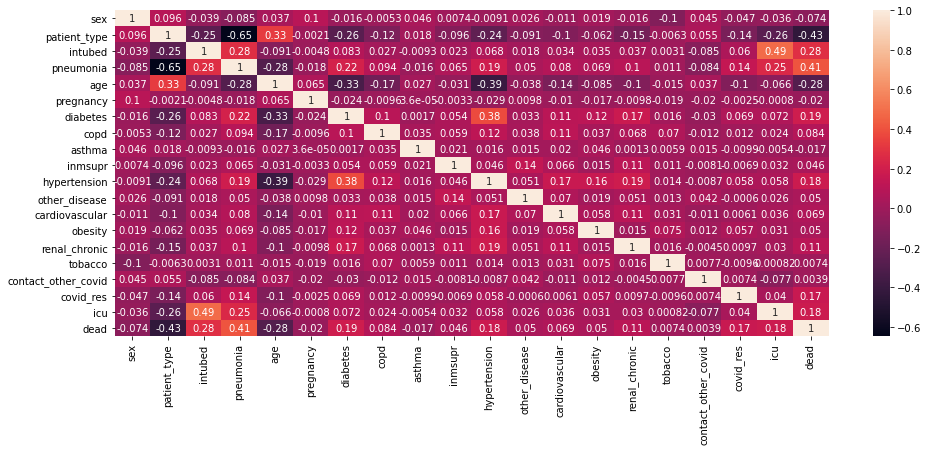

In [55]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

# Respondendo a questão c) Qual a variável que tem o maior impacto nos pacientes que estão em unidade de terapia intensiva (variável “icu” no dataset)?, vimos que a variável de maior impacto é a intubed com 0.49 de correlação, além disso, vimos também que a variável pneumonia vem em segundo lugar com 0.25 de correlação. 

In [56]:
#!pip install cufflinks

hypertension
1     91862
2    470663
dtype: int64


<AxesSubplot:xlabel='hypertension'>

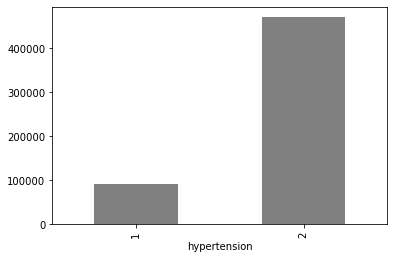

In [57]:
# agrupando os hipertensos
agrupando_hypertension= dados.groupby(['hypertension']).size()
print(agrupando_hypertension)
agrupando_hypertension.plot.bar(color = 'gray')

pregnancy
1      5476
2    557049
dtype: int64


<AxesSubplot:xlabel='pregnancy'>

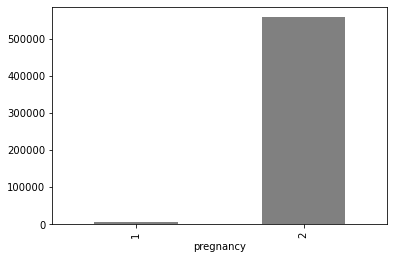

In [58]:
# agrupando as grávidas
agrupando_pregnancy= dados.groupby(['pregnancy']).size()
print(agrupando_pregnancy)
agrupando_pregnancy.plot.bar(color = 'gray')

# Gráfico de mortes de pacientes hipertensos

In [ ]:
morte_hypertension = dados.loc[dados['dead'] == 1]
morte_hypertension = morte_hypertension.groupby(by='hypertension').dead.count()

data = [go.Bar(x=morte_hypertension.index,
                   y=morte_hypertension.values)]

configuracoes_layout = go.Layout(title='Mortes x hypertension',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Hipertensos Mortos'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# Gráfico de mortes de pacientes grávidas

In [60]:
morte_de_gravidas = dados.loc[dados['dead'] == 1]
morte_de_gravidas = morte_de_gravidas.groupby(by='pregnancy').dead.count()

data = [go.Bar(x=morte_de_gravidas.index,
                   y=morte_de_gravidas.values)]

configuracoes_layout = go.Layout(title='Mortes x Grávidas',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Grávidas Mortas'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# Gráfico de mortes por idade

In [61]:
morte_por_idade = dados.loc[dados['dead'] == 1]

morte_por_idade = morte_por_idade.groupby(by='age').dead.count()

data = [go.Bar(x=morte_por_idade.index,
                   y=morte_por_idade.values)]

configuracoes_layout = go.Layout(title='Mortes por Idade',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Idade'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)

# Gráfico de internações por idade

In [62]:
dados_internacao = dados.loc[dados['icu'] == 2]

internacao_por_idade = dados_internacao.groupby(by='age').icu.count()

data = [go.Bar(x=internacao_por_idade.index,
                   y=internacao_por_idade.values)]

configuracoes_layout = go.Layout(title='Internações por Idade',
                                yaxis={'title':'Quantidade'},
                                xaxis={'title':'Idade'})

fig = go.Figure(data=data, layout=configuracoes_layout)

py.iplot(fig)
#pyo.plot(fig)

# Variável alvo totalmente desbalanceada

In [63]:
dados.icu.value_counts()

2    552683
1      9842
Name: icu, dtype: int64

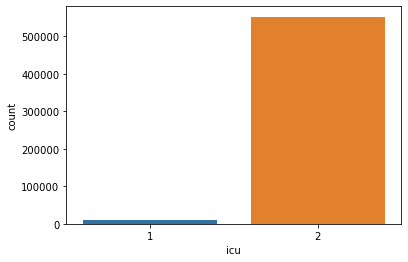

In [64]:
ax = sns.countplot(x="icu", data=dados)

# Removendo features que não vão para o modelo

In [65]:
# Função para remover features
def remove_features(lista_features):
    for i in lista_features:
        dados.drop(i, axis=1, inplace=True)
    return 0

In [66]:
dados.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu', 'dead'],
      dtype='object')

In [67]:
# Remove features
remove_features(['id','entry_date','date_symptoms','date_died','dead'])

0

# Dividindo os dados em treino e teste

In [68]:
X_train, X_test, y_train, y_test = train_test_split(dados.drop('icu',axis=1),dados['icu'],test_size=0.3)

### Verificando a forma dos dados

In [69]:
X_train.shape,X_test.shape

((393767, 18), (168758, 18))

In [70]:
y_train.shape,y_test.shape

((393767,), (168758,))

### Instânciando o algoritmo KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Executando o KNN com o conjunto de teste

In [73]:
resultado = knn.predict(X_test)

## Técnicas de Validação

### Matriz de Confusão

In [74]:
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       0.46      0.20      0.28      3011
           2       0.99      1.00      0.99    165747

    accuracy                           0.98    168758
   macro avg       0.72      0.60      0.64    168758
weighted avg       0.98      0.98      0.98    168758



Note que o recall (número de acertos) para a classe 2 é muito alta, por outro lado é bem baixa para a classe 1.

Isso só reforça o que já sabemos, nosso modelo está enviesado, ele aprendeu mais sobre a classe que tinha uma maior quantidade de exemplos.

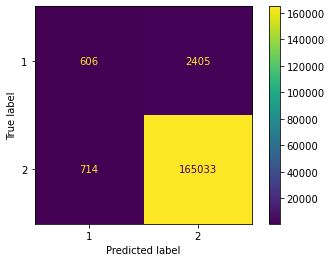

In [75]:
plot_confusion_matrix(knn, X_test, y_test)

# Cross Validation

In [76]:
scores = cross_val_score(knn, dados.drop('icu',axis=1),dados['icu'], cv=5)
scores

array([0.96503267, 0.97945869, 0.97957424, 0.98304964, 0.98309408])

# Aplicando o SMOTE (Synthetic Minority Over-sampling Technique)
### Gera dados sintéticos da classe minoritária.

Instânciando o SMOTE

In [77]:
smt = SMOTE()

In [78]:
X, y = smt.fit_resample(dados.drop("icu", axis = 1), dados['icu'])

In [79]:
np.bincount(dados.icu)

array([     0,   9842, 552683], dtype=int64)

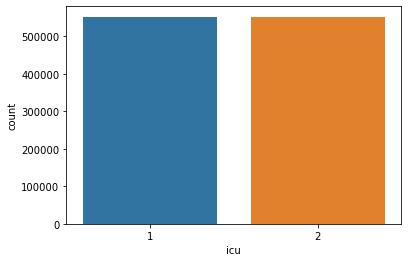

In [80]:
#Gráfico mostrando que as classes foram balanceadas.
ax = sns.countplot(x=y)

# Dividindo os dados em treino e teste


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

### Instânciando o algoritmo KNN


In [82]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algoritmo 

In [83]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Executando o KNN com o conjunto de teste

In [84]:
resultado_smt = knn.predict(X_test)

## Técnicas de Validação

### Matriz de Confusão


In [85]:
print(metrics.classification_report(y_test,resultado_smt))

              precision    recall  f1-score   support

           1       0.92      0.97      0.95    138171
           2       0.97      0.92      0.94    138171

    accuracy                           0.94    276342
   macro avg       0.95      0.94      0.94    276342
weighted avg       0.95      0.94      0.94    276342



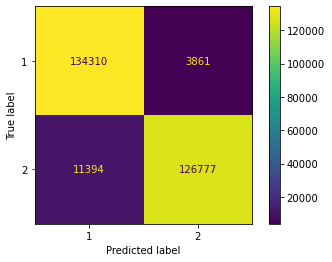

In [86]:
plot_confusion_matrix(knn, X_test, y_test)

# Cross Validation

In [ ]:
scores = cross_val_score(knn, dados.drop('icu',axis=1),dados['icu'], cv=5)
scores

# COMUNICAÇÃO DOS RESULTADOS
Persistindo o modelo de Machine Learning para o disco.
Persistir o modelo para o disco, nada mais é de tirar da memória o modelo e coloca no seu disco físico, para com isso ser utilizado da forma que você quiser, ser implementado em um sistema de terceiros por exemplo.

In [ ]:
# Persistindo o modelo em disco.
joblib.dump(knn, 'model.pkl')

# Carregando o modelo a partir do disco para a memória.
Lendo o modelo que está no disco

In [ ]:
model = joblib.load('model.pkl')

In [ ]:
model

# Teste de Classificação.
Aqui estamos testando nosso modelo, passando para ele uma simulação de dados novos para vermos se ele vai indicar ou não o risco de internação, o resultado vai ser 1 ou 2 que posteriormente pode ser tratado.

Um exemplo de utilização do modelo é ser criada uma pagina web com os campos solicitados e retornar se tem risco ou não de internação de acordo com a resposta do modelo.

In [ ]:
teste = np.array([[1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]])

In [ ]:
model.predict(teste)

# Probabilidades de Classes
O método predict_proba é utilizado para saber quais as probabilidades de classes a serem retornadas pelo modelo.

In [ ]:
model.predict_proba(teste)

# d) (BÔNUS) Qual o perfil de paciente que possui maior probabilidade de sair com vida?

Respondendo esssa pergunta foi visto no teste de predição que quanto menos comorbidades maior a chance de sair com vida.